This is a simple starter notebook to help you get started for the hackathon



In [1]:
%%capture
# Install relevant libraries
!pip install geopandas folium

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import random
import os
from tqdm.notebook import tqdm
import ast

import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import LineString
import folium

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set seed for reproducability
SEED = 2023
random.seed(SEED)
np.random.seed(SEED)


## Loading and previewing data

In [4]:
DATA_PATH = ''
# Load files
train = pd.read_csv(os.path.join(DATA_PATH, 'Train.csv'))
test = pd.read_csv(os.path.join(DATA_PATH, 'Test.csv'))
samplesubmission = pd.read_csv(os.path.join(DATA_PATH, 'SampleSubmission.csv'))
graph_df = pd.read_csv(os.path.join(DATA_PATH, 'Graph.csv'))

# Preview train dataset
train.head()

ID  \
0     5265971867368357888_X_lbo_weekday_X_morning_rush_hour   
1  17637398975726110720_X_other_holiday_X_morning_rush_hour   
2   8568741015432481792_X_other_weekday_X_evening_rush_hour   
3   1464534661918074112_X_first_holiday_X_evening_rush_hour   
4    4278874665015895552_X_last_weekday_X_morning_rush_hour   

          persistent_id            day    prediction_type  count_norm_00_0_  \
0   5265971867368357888    lbo_weekday  morning_rush_hour           0.00012   
1  17637398975726110720  other_holiday  morning_rush_hour           0.00055   
2   8568741015432481792  other_weekday  evening_rush_hour               NaN   
3   1464534661918074112  first_holiday  evening_rush_hour               NaN   
4   4278874665015895552   last_weekday  morning_rush_hour           0.00002   

   count_norm_00_1_  count_norm_00_2_  count_norm_00_3_  count_norm_01_0_  \
0           0.00009           0.00009           0.00007           0.00003   
1           0.00041           0.00042           0.00047           0.00043   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4           0.00002               NaN           0.00003               NaN   

   count_norm_01_1_  count_norm_01_2_  count_norm_01_3_  count_norm_02_0_  \
0           0.00006           0.00009           0.00003           0.00005   
1           0.00043           0.00028           0.00032           0.00037   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4           0.00001           0.00001           0.00003           0.00002   

   count_norm_02_1_  count_norm_02_2_  count_norm_02_3_  count_norm_03_0_  \
0           0.00007           0.00003           0.00003               NaN   
1           0.00023           0.00029           0.00020           0.00024   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4           0.00003               NaN               NaN               NaN   

   count_norm_03_1_  count_norm_03_2_  count_norm_03_3_  count_norm_04_0_  \
0           0.00002           0.00001           0.00003               NaN   
1           0.00021           0.00025           0.00021           0.00016   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4           0.00001           0.00001               NaN           0.00002   

   count_norm_04_1_  count_norm_04_2_  count_norm_04_3_  count_norm_05_0_  \
0           0.00003           0.00003           0.00004           0.00006   
1           0.00010           0.00013           0.00016           0.00015   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4           0.00002               NaN           0.00001           0.00004   

   count_norm_05_1_  count_norm_07_2_  count_norm_07_3_  count_norm_08_0_  \
0           0.00009               NaN               NaN               NaN   
1           0.00017               NaN               NaN               NaN   
2               NaN           0.00006           0.00005           0.00010   
3               NaN           0.00035           0.00043           0.00078   
4           0.00003               NaN               NaN               NaN   

   count_norm_08_1_  count_norm_08_2_  count_norm_08_3_  count_norm_09_0_  \
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2           0.00009           0.00008           0.00014           0.00014   
3           0.00053           0.00074           0.00058           0.00061   
4               NaN               NaN   

In [5]:
# Preview test dataset
test.head()

ID  \
0    12170463379909937152_X_last_weekday_X_morning_rush_hour   
1     12462211467129128960_X_lbo_weekday_X_evening_rush_hour   
2    17199689856168204288_X_last_weekday_X_evening_rush_hour   
3  12559239482074976256_X_second_weekday_X_evening_rush_hour   
4    3456135199470793216_X_other_holiday_X_evening_rush_hour   

          persistent_id             day    prediction_type  count_norm_00_0_  \
0  12170463379909937152    last_weekday  morning_rush_hour           0.00012   
1  12462211467129128960     lbo_weekday  evening_rush_hour               NaN   
2  17199689856168204288    last_weekday  evening_rush_hour               NaN   
3  12559239482074976256  second_weekday  evening_rush_hour               NaN   
4   3456135199470793216   other_holiday  evening_rush_hour               NaN   

   count_norm_00_1_  count_norm_00_2_  count_norm_00_3_  count_norm_01_0_  \
0           0.00012           0.00010           0.00007           0.00002   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   count_norm_01_1_  count_norm_01_2_  count_norm_01_3_  count_norm_02_0_  \
0           0.00006           0.00003           0.00006           0.00004   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   count_norm_02_1_  count_norm_02_2_  count_norm_02_3_  count_norm_03_0_  \
0           0.00003           0.00002           0.00005           0.00003   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   count_norm_03_1_  count_norm_03_2_  count_norm_03_3_  count_norm_04_0_  \
0           0.00002           0.00001           0.00001           0.00001   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   count_norm_04_1_  count_norm_04_2_  count_norm_04_3_  count_norm_05_0_  \
0           0.00005               NaN           0.00003           0.00005   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   count_norm_05_1_  count_norm_07_2_  count_norm_07_3_  count_norm_08_0_  \
0           0.00002               NaN               NaN               NaN   
1               NaN           0.00004           0.00007           0.00007   
2               NaN           0.00022           0.00018           0.00023   
3               NaN           0.00011           0.00005           0.00009   
4               NaN           0.00049           0.00059           0.00044   

   count_norm_08_1_  count_norm_08_2_  count_norm_08_3_  count_norm_09_0_  \
0               NaN               NaN               NaN               NaN   
1           0.00009           0.00003           0.00005           0.00004   
2           0.00028           0.00034           0.00027           0.00030   
3           0.00012           0.00016           0.00017           0.00017   
4           0.00059          

In [6]:
# Preview sample submission file
samplesubmission.head()

ID  target
0    12170463379909937152_X_last_weekday_X_morning_rush_hour       0
1     12462211467129128960_X_lbo_weekday_X_evening_rush_hour       0
2    17199689856168204288_X_last_weekday_X_evening_rush_hour       0
3  12559239482074976256_X_second_weekday_X_evening_rush_hour       0
4    3456135199470793216_X_other_holiday_X_evening_rush_hour       0

In [7]:
# Preview graph data
graph_df.head()

can_bind_to_reverse_edge  category country_isocode  edge_type  \
0                         0         3              GH  NamedRoad   
1                         0         3              GH  NamedRoad   
2                         0         4              GH   Junction   
3                         0         3              GH  NamedRoad   
4                         0         4              GH   Junction   

   ends_with_crosswalk  ends_with_railroad_crossing  ends_with_toll_post  \
0                    0                            0                    0   
1                    0                            0                    0   
2                    0                            0                    0   
3                    0                            0                    0   
4                    0                            0                    0   

   ends_with_traffic_light                                        geometry  \
0                        0  [(-0.189151, 5.595241), (-0.188752, 5.594932)]   
1                        0  [(-0.189227, 5.595286), (-0.189151, 5.595241)]   
2                        0   [(-0.189227, 5.595286), (-0.189227, 5.59533)]   
3                        0  [(-0.189305, 5.595332), (-0.189227, 5.595286)]   
4                        0  [(-0.189296, 5.595445), (-0.189245, 5.595428)]   

                                          geometry_wkt  has_masstransit_lane  \
0  LINESTRING (-0.189151 5.595241, -0.188752 5.594932)                     0   
1  LINESTRING (-0.189227 5.595286, -0.189151 5.595241)                     0   
2   LINESTRING (-0.189227 5.595286, -0.189227 5.59533)                     0   
3  LINESTRING (-0.189305 5.595332, -0.189227 5.595286)                     0   
4  LINESTRING (-0.189296 5.595445, -0.189245 5.595428)                     0   

   is_in_poor_condition  is_paved  is_residential  is_restricted_for_trucks  \
0                     0         1               0                         0   
1                     0         1               0                         0   
2                     0         1               0                         0   
3                     0         1               0                         0   
4                     0         1               0                         0   

   is_toll   length         persistent_id  reverse_id  segments  speed_limit  \
0        0 55.90000   5866506870203210241         NaN         1     13.88889   
1        0  9.80000  12392994614274870894         NaN         1          NaN   
2        0  4.80000  16254274821699868921         NaN         1          NaN   
3        0  9.90000    672826643438406512         NaN         1          NaN   
4        0  5.90000   6431880363583113098         NaN         1          NaN   

  struct_type      timezone                        toponym  traffic_side  
0        Road  Africa/Accra  Olusegun Obasanjo High Street             0  
1        Road  Africa/Accra  Olusegun Obasanjo High Street             0  
2        Road  Africa/Accra                            NaN             0  
3        Road  Africa/Accra  Olusegun Obasanjo High Street             0  
4        Road  Africa/Accra  Olusegun Obasanjo High Street             0

In [8]:
# Check size and shape of datasets
train.shape, test.shape, samplesubmission.shape

((30306, 165), (13670, 164), (13670, 2))

In [9]:
# Train to test sets ratio
(test.shape[0]) / (train.shape[0] + test.shape[0])

0.3108513734764417


## Statistical summaries

In [10]:
# Train statistical summary
train.describe(include = 'all')

ID  \
count                                                   30306   
unique                                                  30306   
top     5265971867368357888_X_lbo_weekday_X_morning_rush_hour   
freq                                                        1   
mean                                                      NaN   
std                                                       NaN   
min                                                       NaN   
25%                                                       NaN   
50%                                                       NaN   
75%                                                       NaN   
max                                                       NaN   

                    persistent_id            day    prediction_type  \
count                 30306.00000          30306              30306   
unique                        NaN              7                  2   
top                           NaN  first_holiday  evening_rush_hour   
freq                          NaN           4360              15270   
mean    9130416332542675968.00000            NaN                NaN   
std     5372752962332899328.00000            NaN                NaN   
min        7565502159581291.00000            NaN                NaN   
25%     4362244534498276352.00000            NaN                NaN   
50%     9304288661231020032.00000            NaN                NaN   
75%    13872295097892935680.00000            NaN                NaN   
max    18403367962451822592.00000            NaN                NaN   

        count_norm_00_0_  count_norm_00_1_  count_norm_00_2_  \
count        13606.00000       13522.00000       13275.00000   
unique               NaN               NaN               NaN   
top                  NaN               NaN               NaN   
freq                 NaN               NaN               NaN   
mean             0.00015           0.00013           0.00012   
std              0.00019           0.00017           0.00016   
min              0.00001           0.00001           0.00001   
25%              0.00004           0.00003           0.00003   
50%              0.00008           0.00008           0.00007   
75%              0.00018           0.00016           0.00014   
max              0.00225           0.00216           0.00201   

        count_norm_00_3_  count_norm_01_0_  count_norm_01_1_  \
count        13261.00000       13036.00000       12916.00000   
unique               NaN               NaN               NaN   
top                  NaN               NaN               NaN   
freq                 NaN               NaN               NaN   
mean             0.00012           0.00010           0.00010   
std              0.00015           0.00013           0.00013   
min              0.00001           0.00001           0.00001   
25%              0.00003           0.00003           0.00003   
50%              0.00006           0.00006           0.00005   
75%              0.00014           0.00013           0.00011   
max              0.00210           0.00185           0.00181   

        count_norm_01_2_  count_norm_01_3_  count_norm_02_0_  \
count        12639.00000       12482.00000       12332.00000   
unique               NaN               NaN               NaN   
top                  NaN               NaN               NaN   
freq                 NaN               NaN               NaN   
mean             0.00009           0.00008           0.00008   
std              0.00011           0.00010           0.00010   
min              0.00001           0.00001           0.00001   
25%              0.00002           0.00002           0.00002   
50%              0.00005           0.00005           0.00004   
75%              0.00010           0.00010           0.00009   
max              0.00135           0.00122           0.00130   

        count_norm_02_1_  count_norm_02_2_  count_norm_02_3_  \
count        12204.00000       12073.00000       11731

From the above statistical summary, we can deduce some of the following insights:
 - The train data provided has 26205 data points
 - There are 7 unique days in the dataset
 - There are a lot of missing values
 - The maximum target/speed is 45.49706

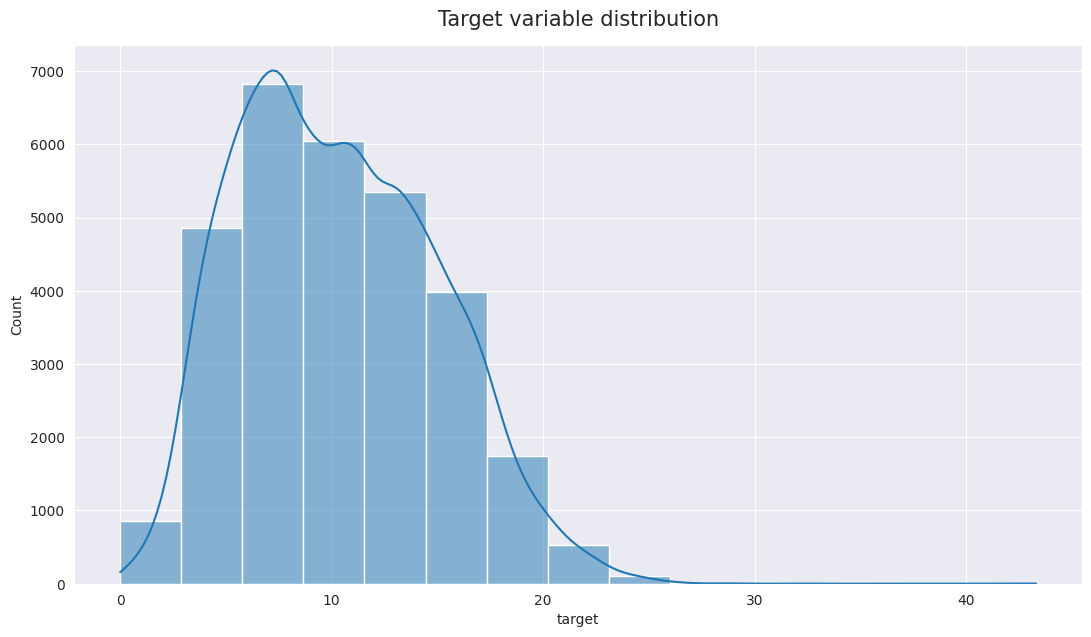

None

0.3725853691911574

In [11]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(train.target, kde = True, bins = 15)
plt.title('Target variable distribution', y = 1.02, fontsize = 15)
display(plt.show(), train.target.skew())

The target variable is appears to be normally distributed but has a skew of ~0.47




## Outliers


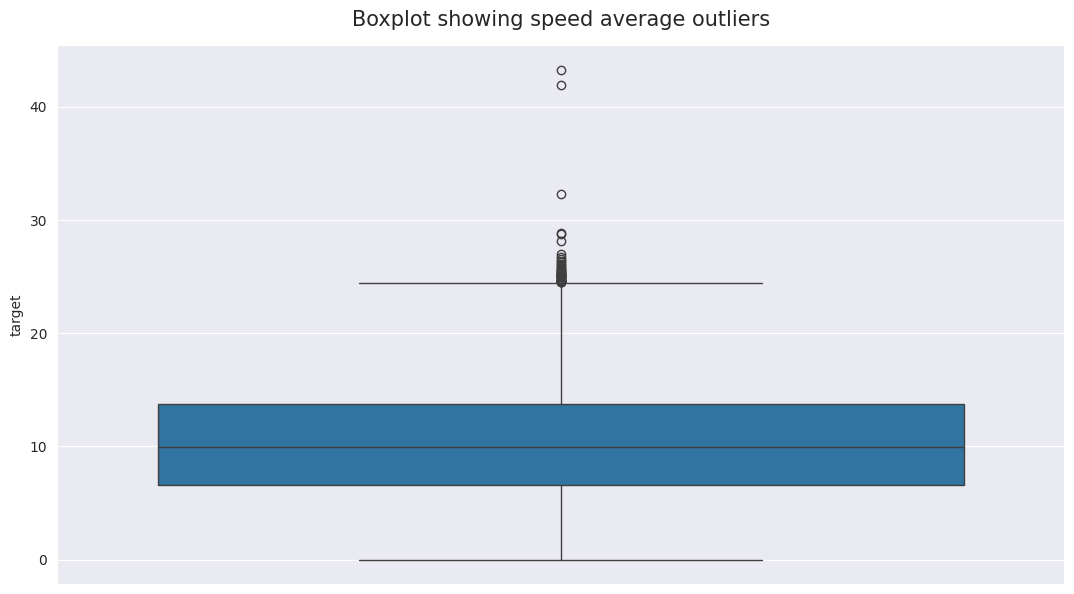

In [12]:
# Plotting boxplot for speed average
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.boxplot(train.target)
plt.title('Boxplot showing speed average outliers', y = 1.02, fontsize = 15)
plt.show()

Outliers are those data points which differ significantly from other observations present in given dataset.

Suggestions on how to handle outliers:
 - Transforming the outliers by scaling - log transformation, box-cox transformation ...
 - Dropping outliers
 - Imputation by replacing outliers with mean, median ...



## Roads Visualisation

In [13]:
# Create a geopandas df
# convert the geometry column to a tuple
graph_df.geometry = graph_df.geometry.apply(lambda x: ast.literal_eval(x.replace(';', ',').replace('[', '(').replace(']', ')')))

# Create LineString objects from the tuples of coordinates
lines = [LineString(coords) for coords in graph_df['geometry']]

# Create a GeoDataFrame with LineString geometry
gdf = gpd.GeoDataFrame(graph_df, geometry=lines)

# Preview
gdf.head(2)

can_bind_to_reverse_edge  category country_isocode  edge_type  \
0                         0         3              GH  NamedRoad   
1                         0         3              GH  NamedRoad   

   ends_with_crosswalk  ends_with_railroad_crossing  ends_with_toll_post  \
0                    0                            0                    0   
1                    0                            0                    0   

   ends_with_traffic_light                                         geometry  \
0                        0  LINESTRING (-0.18915 5.59524, -0.18875 5.59493)   
1                        0  LINESTRING (-0.18923 5.59529, -0.18915 5.59524)   

                                          geometry_wkt  has_masstransit_lane  \
0  LINESTRING (-0.189151 5.595241, -0.188752 5.594932)                     0   
1  LINESTRING (-0.189227 5.595286, -0.189151 5.595241)                     0   

   is_in_poor_condition  is_paved  is_residential  is_restricted_for_trucks  \
0                     0         1               0                         0   
1                     0         1               0                         0   

   is_toll   length         persistent_id  reverse_id  segments  speed_limit  \
0        0 55.90000   5866506870203210241         NaN         1     13.88889   
1        0  9.80000  12392994614274870894         NaN         1          NaN   

  struct_type      timezone                        toponym  traffic_side  
0        Road  Africa/Accra  Olusegun Obasanjo High Street             0  
1        Road  Africa/Accra  Olusegun Obasanjo High Street             0

### Visualise all the road sections in the provided dataset

In [14]:
# Create a Folium map centered at a specific location
map_center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]
mymap = folium.Map(location=map_center, zoom_start=11)

# Iterate through the GeoDataFrame and add LineString objects to the map
for idx, row in gdf.iterrows():
    folium.GeoJson(row['geometry']).add_to(mymap)

# Display the map
mymap

### Visualise road sections in training and test datasets

In [15]:
train_copy = train[['persistent_id', 'target']]
train_copy ['dataset'] = 'train'
test_copy = test[['persistent_id']]
test_copy ['dataset'] = 'test'
train_test = pd.concat([train_copy, test_copy])
new_gdf = gdf.merge(train_test[['persistent_id', 'target', 'dataset']], how = 'left', on = ['persistent_id'])
new_gdf.head(2)

can_bind_to_reverse_edge  category country_isocode  edge_type  \
0                         0         3              GH  NamedRoad   
1                         0         3              GH  NamedRoad   

   ends_with_crosswalk  ends_with_railroad_crossing  ends_with_toll_post  \
0                    0                            0                    0   
1                    0                            0                    0   

   ends_with_traffic_light                                         geometry  \
0                        0  LINESTRING (-0.18915 5.59524, -0.18875 5.59493)   
1                        0  LINESTRING (-0.18923 5.59529, -0.18915 5.59524)   

                                          geometry_wkt  has_masstransit_lane  \
0  LINESTRING (-0.189151 5.595241, -0.188752 5.594932)                     0   
1  LINESTRING (-0.189227 5.595286, -0.189151 5.595241)                     0   

   is_in_poor_condition  is_paved  is_residential  is_restricted_for_trucks  \
0                     0         1               0                         0   
1                     0         1               0                         0   

   is_toll   length         persistent_id  reverse_id  segments  speed_limit  \
0        0 55.90000   5866506870203210241         NaN         1     13.88889   
1        0  9.80000  12392994614274870894         NaN         1          NaN   

  struct_type      timezone                        toponym  traffic_side  \
0        Road  Africa/Accra  Olusegun Obasanjo High Street             0   
1        Road  Africa/Accra  Olusegun Obasanjo High Street             0   

   target dataset  
0     NaN     NaN  
1     NaN     NaN

In [16]:
# Preview roads in train
new_gdf.toponym.value_counts(normalize = True).head()

toponym
Nsawam Road                  0.10744
Winneba Road                 0.09377
George Walker Bush Highway   0.09188
La Road                      0.05467
Giffard Road                 0.05201
Name: proportion, dtype: float64

In [17]:
# Visualise Winneba Road
Winneba = new_gdf[new_gdf.toponym == 'Winneba Road']

# Create a Folium map centered at a specific location
map_center = [Winneba.geometry.centroid.y.mean(), Winneba.geometry.centroid.x.mean()]
mymap = folium.Map(location=map_center, zoom_start=20)

# Iterate through the GeoDataFrame and add LineString objects to the map
for idx, row in Winneba.iterrows():
    folium.GeoJson(row['geometry'], style_function=lambda feature: {'weight': 5}).add_to(mymap)

# Display the map
mymap

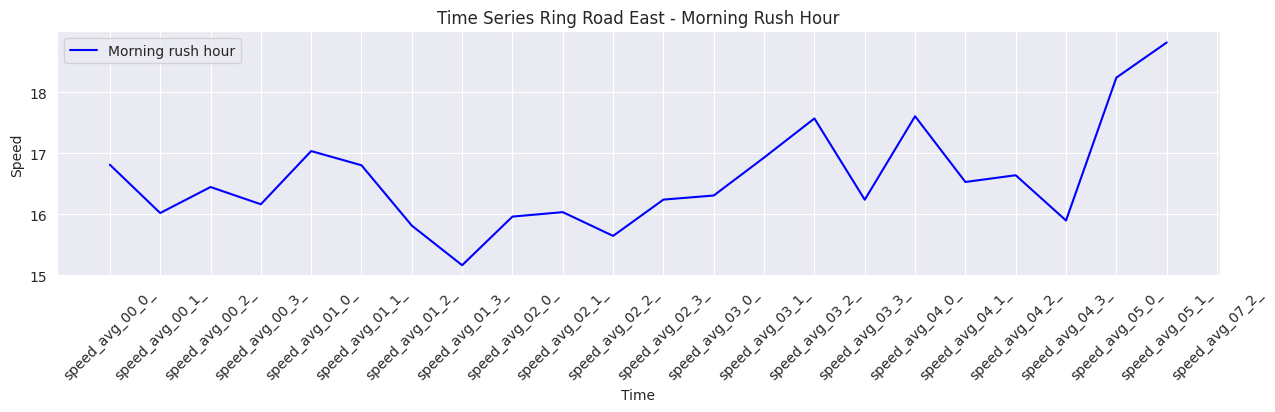

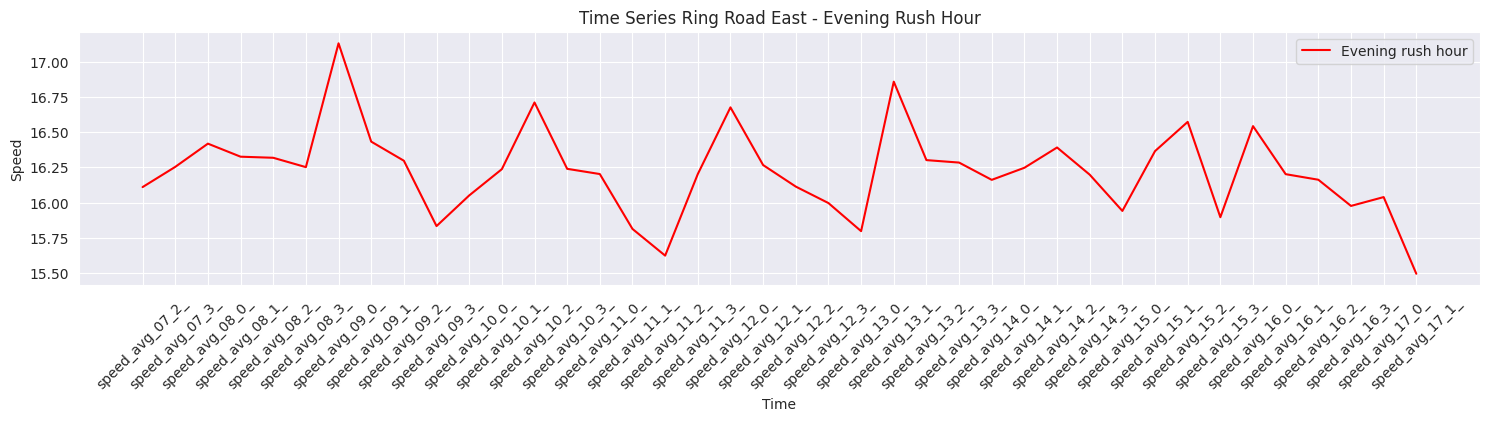

In [19]:
train_graph = train.merge(graph_df, how = 'left', on = 'persistent_id')
Aburi_road = train_graph[train_graph.toponym == 'Ring Road East']

Aburi = Aburi_road[Aburi_road.day == 'other_holiday'][[x for x in Aburi_road.columns if x.startswith('speed_avg')]].T.reset_index().iloc[:, :3]
Aburi.columns = ['time', 'morning_rush', 'evening_rush']
Aburi

plt.figure(figsize=(15, 7))

plt.subplot(2, 1, 1)
plt.plot(Aburi['time'], Aburi['morning_rush'], color='blue', label='Morning rush hour')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Time Series Ring Road East - Morning Rush Hour')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.figure(figsize=(15, 7))
plt.subplot(2, 1, 2)
plt.plot(Aburi.iloc[22:62, :]['time'], Aburi.iloc[22:62, :]['evening_rush'], color='red', label='Evening rush hour')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Time Series Ring Road East - Evening Rush Hour')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()

# Show the plot
plt.show()


## Missing values and duplicates

In [20]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any()

(True, True)

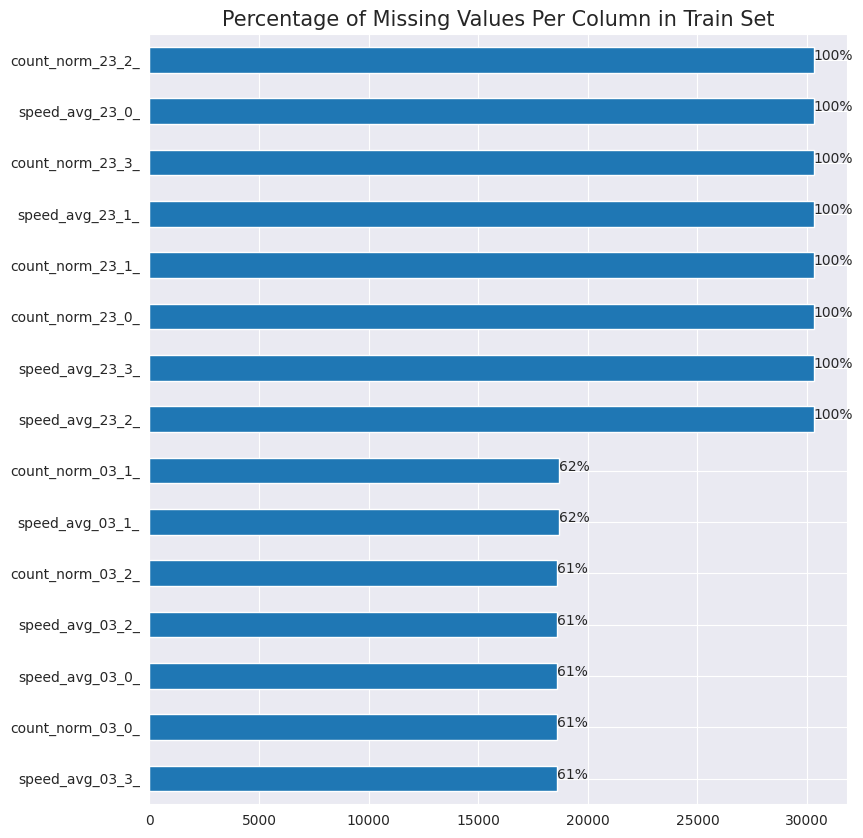

In [21]:
# Plot missing values in train set
ax = train.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

Insights:
 - Most of the times there were no cars at midnight

Suggestions on how to handle missing values:
 - Fill in missing values with mode, mean, median..
 - Drop Missing datapoints with missing values
 - Fill in with a large number e.g -999999

In [22]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)


## Correlations

In [23]:
train.head()

ID  \
0     5265971867368357888_X_lbo_weekday_X_morning_rush_hour   
1  17637398975726110720_X_other_holiday_X_morning_rush_hour   
2   8568741015432481792_X_other_weekday_X_evening_rush_hour   
3   1464534661918074112_X_first_holiday_X_evening_rush_hour   
4    4278874665015895552_X_last_weekday_X_morning_rush_hour   

          persistent_id            day    prediction_type  count_norm_00_0_  \
0   5265971867368357888    lbo_weekday  morning_rush_hour           0.00012   
1  17637398975726110720  other_holiday  morning_rush_hour           0.00055   
2   8568741015432481792  other_weekday  evening_rush_hour               NaN   
3   1464534661918074112  first_holiday  evening_rush_hour               NaN   
4   4278874665015895552   last_weekday  morning_rush_hour           0.00002   

   count_norm_00_1_  count_norm_00_2_  count_norm_00_3_  count_norm_01_0_  \
0           0.00009           0.00009           0.00007           0.00003   
1           0.00041           0.00042           0.00047           0.00043   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4           0.00002               NaN           0.00003               NaN   

   count_norm_01_1_  count_norm_01_2_  count_norm_01_3_  count_norm_02_0_  \
0           0.00006           0.00009           0.00003           0.00005   
1           0.00043           0.00028           0.00032           0.00037   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4           0.00001           0.00001           0.00003           0.00002   

   count_norm_02_1_  count_norm_02_2_  count_norm_02_3_  count_norm_03_0_  \
0           0.00007           0.00003           0.00003               NaN   
1           0.00023           0.00029           0.00020           0.00024   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4           0.00003               NaN               NaN               NaN   

   count_norm_03_1_  count_norm_03_2_  count_norm_03_3_  count_norm_04_0_  \
0           0.00002           0.00001           0.00003               NaN   
1           0.00021           0.00025           0.00021           0.00016   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4           0.00001           0.00001               NaN           0.00002   

   count_norm_04_1_  count_norm_04_2_  count_norm_04_3_  count_norm_05_0_  \
0           0.00003           0.00003           0.00004           0.00006   
1           0.00010           0.00013           0.00016           0.00015   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4           0.00002               NaN           0.00001           0.00004   

   count_norm_05_1_  count_norm_07_2_  count_norm_07_3_  count_norm_08_0_  \
0           0.00009               NaN               NaN               NaN   
1           0.00017               NaN               NaN               NaN   
2               NaN           0.00006           0.00005           0.00010   
3               NaN           0.00035           0.00043           0.00078   
4           0.00003               NaN               NaN               NaN   

   count_norm_08_1_  count_norm_08_2_  count_norm_08_3_  count_norm_09_0_  \
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2           0.00009           0.00008           0.00014           0.00014   
3           0.00053           0.00074           0.00058           0.00061   
4               NaN               NaN   

In [24]:
# Top 20 correlated features to the target
top20_corrs = abs(train.select_dtypes(include='number').corr()['target']).sort_values(ascending = False).head(20)
top20_corrs

target            1.00000
speed_avg_17_0_   0.92594
speed_avg_17_1_   0.92536
speed_avg_16_3_   0.92169
speed_avg_19_2_   0.91381
speed_avg_16_0_   0.91227
speed_avg_15_3_   0.91129
speed_avg_16_2_   0.91016
speed_avg_16_1_   0.90838
speed_avg_19_3_   0.90706
speed_avg_15_2_   0.90556
speed_avg_15_0_   0.90360
speed_avg_15_1_   0.89706
speed_avg_14_3_   0.89598
speed_avg_20_0_   0.89321
speed_avg_14_2_   0.89038
speed_avg_14_1_   0.89024
speed_avg_20_1_   0.88940
speed_avg_14_0_   0.88750
speed_avg_20_2_   0.88274
Name: target, dtype: float64

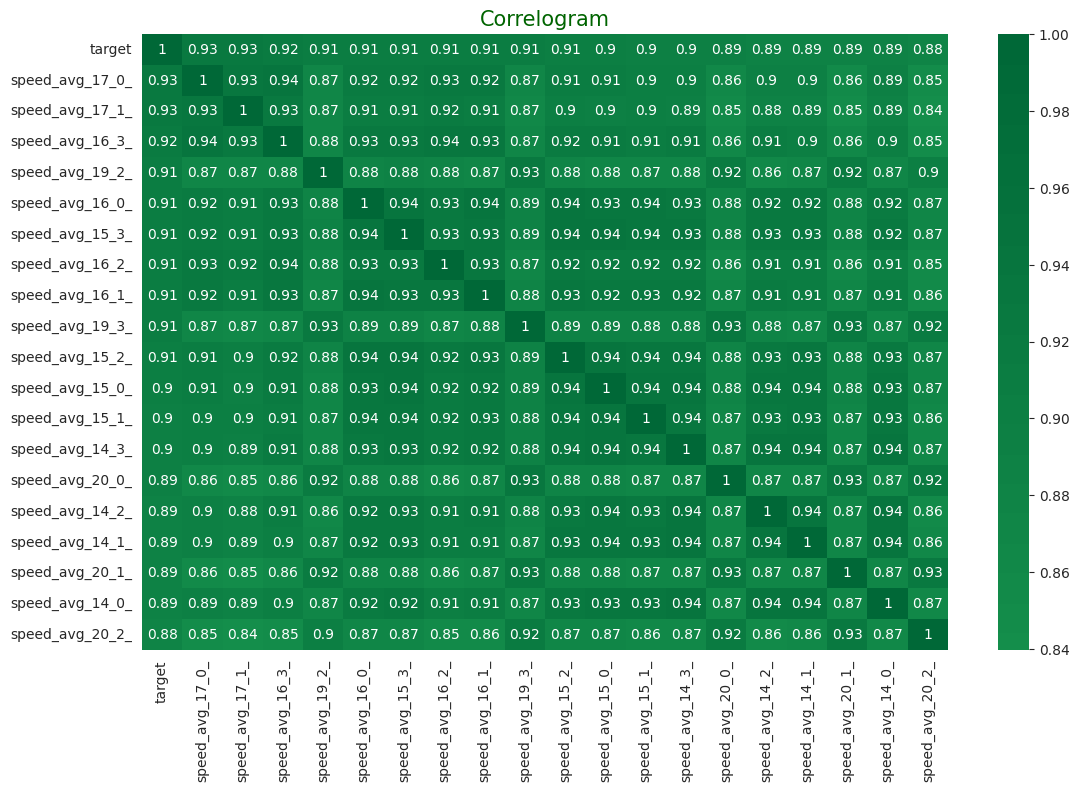

In [25]:
# Quantify correlations between features
corr = train[list(top20_corrs.index)].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()


## Modelling

In [26]:
# Selecting the independent variables and the target variable

X = train.drop(['ID', 'persistent_id', 'day', 'prediction_type', 'target'], axis = 1).fillna(0)
y = train.target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

# Instantiating the model
clf = RandomForestRegressor(random_state = SEED, n_jobs=-1)
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE Score: {mean_squared_error(y_test, y_pred, squared=False)}') # 1.7224933975788321

RMSE Score: 1.708190330756042


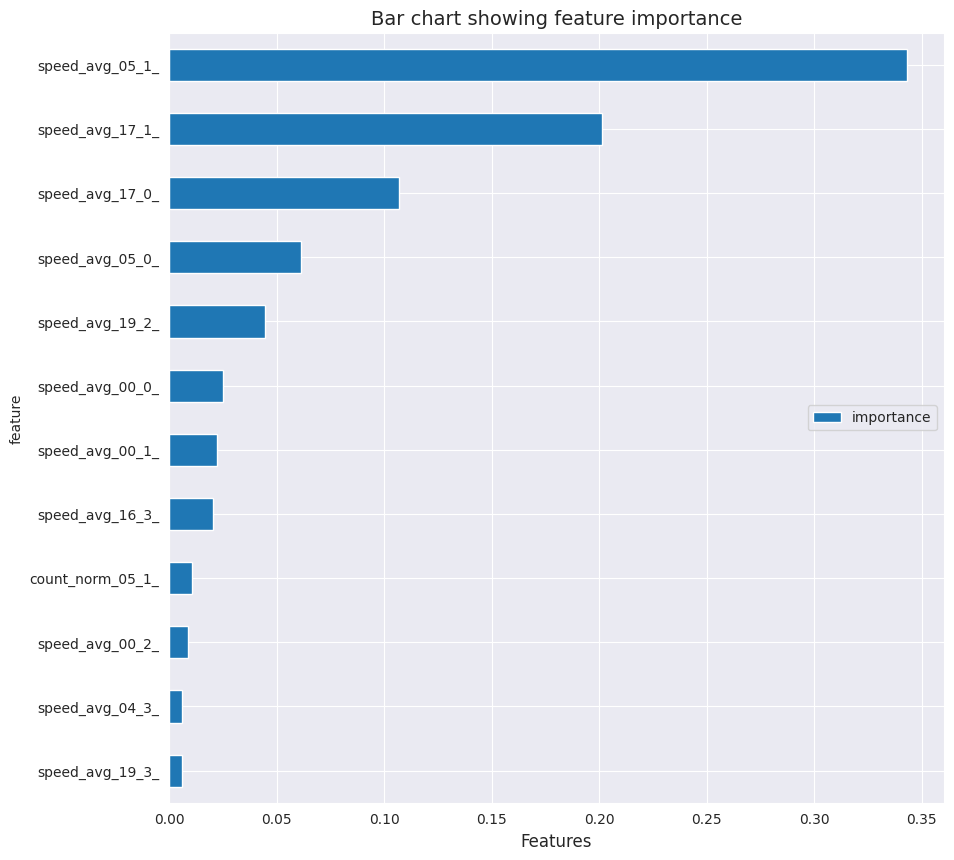

In [27]:
# Feature importance
impo_df = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df = impo_df[:12].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 10))
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', fontsize = 14)
plt.xlabel('Features', fontsize = 12)
plt.show()


## Making predictions of the test set and creating a submission file

In [28]:
# Make prediction on the test set
test_df = test.drop(['ID', 'persistent_id', 'day', 'prediction_type'], axis = 1).fillna(0)
predictions = clf.predict(test_df)

# # Create a submission file
sub_file = pd.DataFrame({'ID': test.ID, 'target': predictions})
sub_file.head()

ID   target
0    12170463379909937152_X_last_weekday_X_morning_rush_hour 14.61062
1     12462211467129128960_X_lbo_weekday_X_evening_rush_hour  8.96833
2    17199689856168204288_X_last_weekday_X_evening_rush_hour 15.79706
3  12559239482074976256_X_second_weekday_X_evening_rush_hour 12.31721
4    3456135199470793216_X_other_holiday_X_evening_rush_hour 13.24104

In [29]:
# Create file
sub_file.to_csv('BaselineSubmission.csv', index = False) # Download subfile and submit to zindi for scoring

## ALL THE BEST AND HAVE FUN &#x1F60E;